<a href="https://colab.research.google.com/github/golesuman/66daysofdata/blob/main/Day68/DataAnalysisonAirdata1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip'

--2022-03-27 08:08:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543989 (1.5M) [application/x-httpd-php]
Saving to: ‘AirQualityUCI.zip’

AirQualityUCI.zip   100%[===================>]   1.47M  3.28MB/s    in 0.4s    

2022-03-27 08:08:01 (3.28 MB/s) - ‘AirQualityUCI.zip’ saved [1543989/1543989]



In [2]:
!unzip AirQualityUCI.zip

Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df=pd.read_excel('AirQualityUCI.xlsx')
df.sample(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
604,2004-04-04,22:00:00,-200.0,1195.75,-200,6.906801,852.75,-200.0,909.00,-200.0,1556.0,768.75,15.775,58.800000,1.046387
6097,2004-11-19,19:00:00,8.3,1622.50,-200,29.814141,1546.50,832.0,414.00,188.0,2039.5,1882.75,16.225,62.575000,1.145490
6721,2004-12-15,19:00:00,3.6,-200.00,-200,-200.000000,-200.00,484.0,-200.00,137.0,-200.0,-200.00,-200.000,-200.000000,-200.000000
3133,2004-07-19,07:00:00,2.3,1278.75,-200,16.578088,1197.25,250.0,598.50,112.0,1905.5,1517.75,22.875,42.975000,1.182643
6192,2004-11-23,18:00:00,10.2,1982.25,-200,49.492093,1958.75,1369.0,322.00,227.0,2535.5,2385.50,13.150,72.600000,1.093646
6271,2004-11-27,01:00:00,4.2,1530.50,-200,17.959730,1238.25,685.0,619.00,140.0,1582.5,1774.00,12.700,77.474998,1.133864
6962,2004-12-25,20:00:00,6.2,1739.00,-200,21.331123,1333.00,821.0,460.25,174.0,1689.0,1832.00,11.275,78.325001,1.045504
8745,2005-03-10,03:00:00,1.1,1014.00,-200,4.368716,730.75,-200.0,784.25,-200.0,1062.0,1038.00,4.575,78.175001,0.668411
6713,2004-12-15,11:00:00,3.5,-200.00,-200,-200.000000,-200.00,809.0,-200.00,176.0,-200.0,-200.00,-200.000,-200.000000,-200.000000
728,2004-04-10,02:00:00,1.7,1074.25,102,6.440555,832.00,101.0,951.25,75.0,1506.5,979.75,11.400,69.775000,0.938961


In [32]:
df.shape

(9357, 15)

In [33]:
features=[feature for feature in df.columns]
# printing the no of null values in dataframe
for category in features:
  print(f'The total no of null values in {category} is {df[category].isna().sum()}')

The total no of null values in Date is 0
The total no of null values in Time is 0
The total no of null values in CO(GT) is 0
The total no of null values in PT08.S1(CO) is 0
The total no of null values in NMHC(GT) is 0
The total no of null values in C6H6(GT) is 0
The total no of null values in PT08.S2(NMHC) is 0
The total no of null values in NOx(GT) is 0
The total no of null values in PT08.S3(NOx) is 0
The total no of null values in NO2(GT) is 0
The total no of null values in PT08.S4(NO2) is 0
The total no of null values in PT08.S5(O3) is 0
The total no of null values in T is 0
The total no of null values in RH is 0
The total no of null values in AH is 0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

## Finding numerical values

In [41]:
len(df.columns)

15

In [40]:
numerical_features=[feature for feature in df.columns if df[feature].values.dtype!='O']
numerical_features

['Date',
 'CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

In [43]:
len(numerical_features)

14

In [48]:
times='22:00:00'
print(times.split(":")[0])

22


In [54]:
df.Time.head()

0    18:00:00
1    19:00:00
2    20:00:00
3    21:00:00
4    22:00:00
Name: Time, dtype: object

In [64]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [84]:
def delete_item():
  for feature in df.columns:
    if feature=='Date' and feature=='Time':
      df.drop(df[df[feature<0]].index,inplace=True)

delete_item()

In [85]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,2.353567,1207.741838,231.025393,10.772367,965.983777,143.501814,963.178053,100.259976,1600.506550,1045.691052,15.599859,49.049557,0.831851
std,1.409496,241.826753,208.461912,7.417127,266.413137,81.829717,265.906153,31.493823,302.290036,400.130277,4.825555,15.266995,0.178506
min,0.300000,752.500000,7.000000,0.542781,447.500000,12.000000,461.250000,19.000000,955.000000,263.000000,6.275000,14.900000,0.402317
25%,1.300000,1016.875000,77.000000,4.804320,753.500000,81.000000,768.875000,78.500000,1369.125000,759.500000,11.875000,36.700000,0.718949
50%,2.000000,1172.000000,157.000000,9.125831,944.250000,128.000000,920.000000,99.000000,1556.250000,1009.000000,15.025000,49.550000,0.817693
75%,3.100000,1380.250000,318.500000,14.803204,1142.375000,187.000000,1131.000000,122.000000,1783.375000,1319.750000,18.350000,60.525001,0.927524
max,8.100000,2039.750000,1189.000000,39.202340,1754.250000,478.000000,1934.500000,196.000000,2679.000000,2358.500000,30.000000,83.224998,1.485238


In [88]:
df['NMHC(GT)'].unique()

array([ 150,  112,   88,   80,   51,   38,   31,   24,    8,   16,   29,
         64,   87,   77,   43,   61,   63,  164,   79,   95,  307,  461,
        401,  197,   26,   55,   53,   40,    7,   17,   33,  202,  208,
        166,  114,  140,  169,  185,  165,  133,  233,  242,  488,  333,
        215,  367,  122,   67,   30,   27,   47,  132,  239,  160,  283,
        210,  154,  108,  111,   97,  191,  258,  284,  269,  180,  116,
         93,  131,   92,   32,   36,   57,  129,  148,  145,   84,   99,
        156,  262,  341,  214,  100,   66,   73,   39,  107,  336,  618,
        438,  334,  221,  207,  141,  471,  685,  538,  319,  224,  155,
         49,   50,  218,  285,  437,  327,  366,  318,  228,  201,  199,
        237,  261,  230,  349,  183,   85,   34,   11,   18,  260,  534,
        368,  200,  188,  152,  103,  193,  134,  386,  577,  523,  472,
        206,  216,  159,   70,   44,   20,   78,  506,  451,  426,  672,
        624,  325,  143,   89,   48,   19,   60,  2

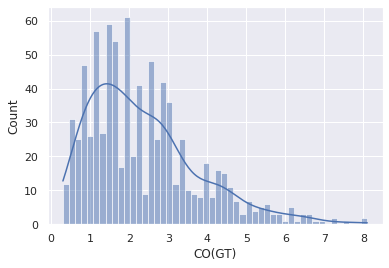

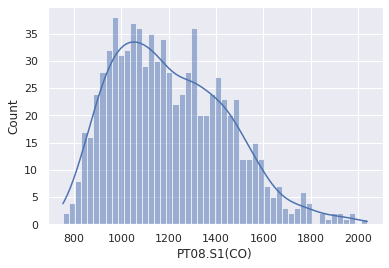

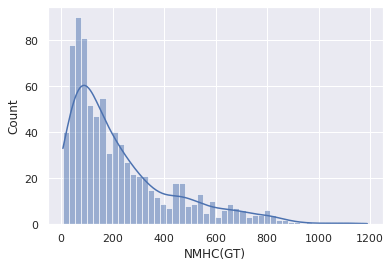

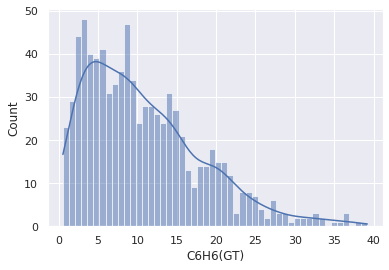

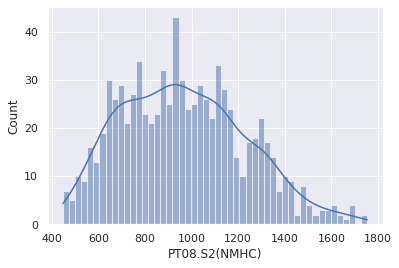

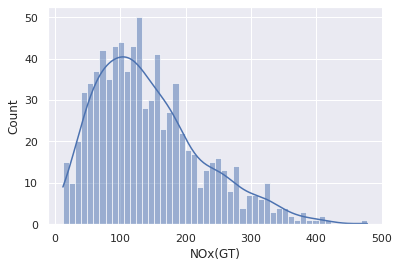

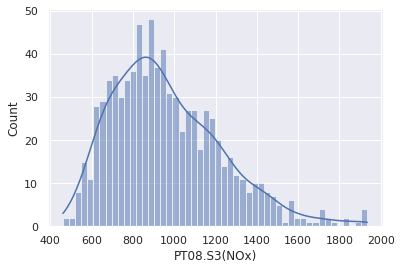

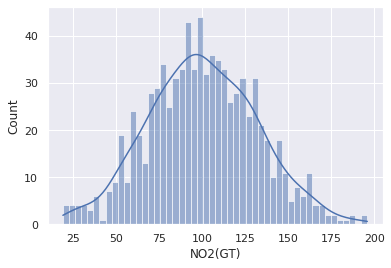

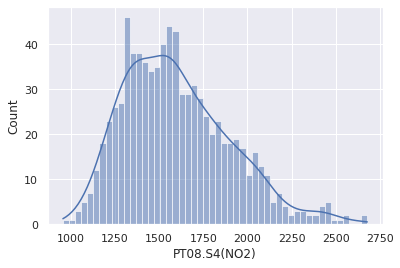

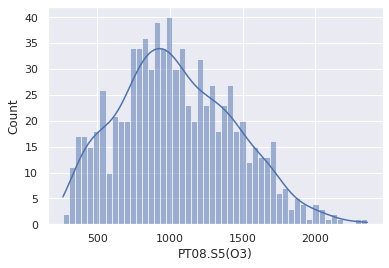

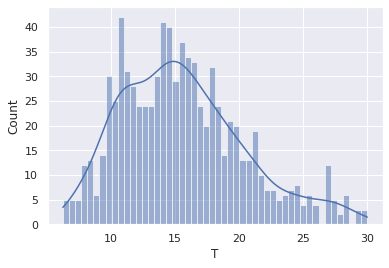

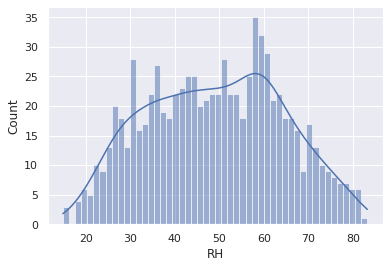

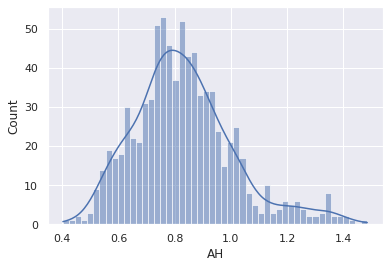

In [93]:
sns.set_theme()
for category in df.columns:
  if category!='Date' and category!='Time':
    sns.histplot(x=category,data=df,bins=50,kde=True)
    plt.show()